# EDA (exploratory data analysis)

 import the libraries

In [1]:
from statistics import quantiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings

I'm editing kaggle terminal output. I ignore library warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
train = pd.read_csv(r"/kaggle/input/house-prices-dataset/train.csv")
test = pd.read_csv(r"/kaggle/input/house-prices-dataset/test.csv")
df = pd.concat([train, test], ignore_index=True).drop(columns='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.000,Unf,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.000,0.000,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.000

In [4]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape,end="\n\n")
    print("##################### Types #####################")
    print(dataframe.dtypes,end="\n\n")
    print("##################### Head #####################")
    print(dataframe.head(3),end="\n\n")
    print("##################### Tail #####################")
    print(dataframe.tail(3),end="\n\n")
    print("##################### NA #####################")
    print(dataframe.isnull().sum(),end="\n\n")
    print("##################### Quantiles #####################")
    for col in dataframe.columns:
        if dataframe[col].dtype != "object":
            print(dataframe[col].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T, end="\t\t")

check_df(df)

##################### Shape #####################
(2919, 80)

##################### Types #####################
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

##################### Head #####################
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL       65.000     8450   Pave   NaN      Reg   
1          20       RL       80.000     9600   Pave   NaN      Reg   
2          60       RL       68.000    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe if dataframe[col].dtype == "O"]

    num_but_cat = [col for col in dataframe if len(dataframe[col].unique()) < cat_th
                   and dataframe[col].dtype != "O"]

    cat_but_car = [col for col in dataframe if len(dataframe[col].unique()) > car_th
                   and dataframe[col].dtype != "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("observations : ", dataframe.shape[0], end="\n\n")
    print("features : ", dataframe.shape[1], end="\n\n")
    print("Categorical columns : ", len(cat_cols), end="\n\n")
    print("Numerical columns : ", len(num_cols), end="\n\n")
    print("Categorical columns but not car columns : ", len(cat_but_car), end="\n\n")
    print("Numerical columns but not car columns : ", len(num_but_cat), end="\n\n")
    print("Categorical columns but not car columns : ", cat_cols, end="\n\n")
    print("Numerical columns but not car columns : ", num_but_cat, end="\n\n")
    print("Car columns : ", cat_but_car, end="\n\n")
    print("Car columns : ", cat_but_car, end="\n\n")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)



observations :  2919

features :  80

Categorical columns :  53

Numerical columns :  27

Categorical columns but not car columns :  22

Numerical columns but not car columns :  10

Categorical columns but not car columns :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']

Numerical columns but not car columns :  ['OverallCon

## Analysis of categorical variables

In [6]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        plt.style.use("fivethirtyeight")
        plt.figure(figsize=(12, 9), dpi=80)
        if len(dataframe[col_name].unique()) < 10:
            
            sns.countplot(x=dataframe[col_name], data=dataframe, palette="pastel")
            plt.show(block=True)
        else:
            plt.show(block=True)
            sns.countplot(y=dataframe[col_name], data=dataframe, palette="pastel")


for col in cat_cols:
    cat_summary(dataframe=df, col_name=col, plot=False)


          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856
        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411
       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672
          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548
             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055
           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034
           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  

## Analysis of numerical variables

In [7]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T,end="\n\n\n")

    if plot:
        plt.style.use("ggplot")
        plt.figure(figsize=(12, 9), dpi=80)
        sns.histplot(data=dataframe, x=numerical_col, bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print("#####################################", end="\n\n")


for col in num_cols:
    num_summary(dataframe=df, numerical_col=col, plot=False)


count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float6

## Analysis of target variable

In [8]:
def target_summary_cat_barplot(dataframe, target, categorial_col, plot=False):
    groupData = dataframe.groupby(categorial_col)[target].mean()
    print(groupData,end="\n\n\n\n")
    if plot:
        plt.style.use("ggplot")
        plt.figure(figsize=(12, 9), dpi=80)
        sns.barplot(x=groupData.index, y=groupData.values)
        plt.xlabel(categorial_col)
        plt.ylabel(target)
        plt.title(target + " by " + categorial_col)
        plt.show(block=True)
for col in cat_cols:
    target_summary_cat_barplot(dataframe=df, target="SalePrice", categorial_col=col, plot=False)


MSZoning
C (all)    74528.000
FV        214014.062
RH        131558.375
RL        191004.995
RM        126316.830
Name: SalePrice, dtype: float64



Street
Grvl   130190.500
Pave   181130.539
Name: SalePrice, dtype: float64



Alley
Grvl   122219.080
Pave   168000.585
Name: SalePrice, dtype: float64



LotShape
IR1   206101.665
IR2   239833.366
IR3   216036.500
Reg   164754.818
Name: SalePrice, dtype: float64



LandContour
Bnk   143104.079
HLS   231533.940
Low   203661.111
Lvl   180183.747
Name: SalePrice, dtype: float64



Utilities
AllPub   180950.957
NoSeWa   137500.000
Name: SalePrice, dtype: float64



LotConfig
Corner    181623.426
CulDSac   223854.617
FR2       177934.574
FR3       208475.000
Inside    176938.048
Name: SalePrice, dtype: float64



LandSlope
Gtl   179956.800
Mod   196734.138
Sev   204379.231
Name: SalePrice, dtype: float64



Neighborhood
Blmngtn   194870.882
Blueste   137500.000
BrDale    104493.750
BrkSide   124834.052
ClearCr   212565.429
CollgCr   197965.773

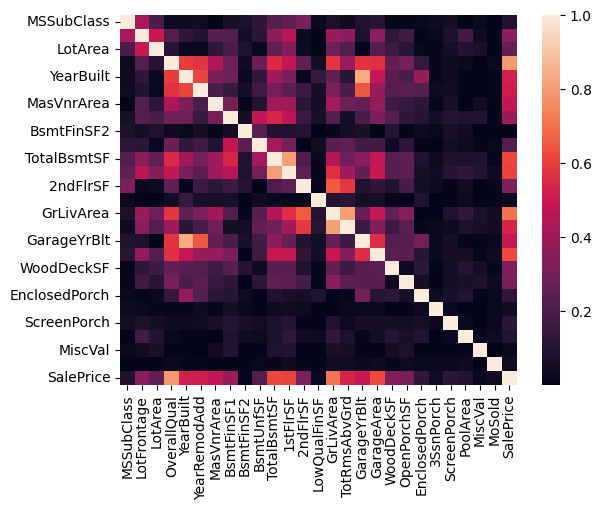

In [9]:
corr_matrix = df[num_cols].corr()
corr_matrix = corr_matrix.abs()
sns.heatmap(df[num_cols].corr().abs())
plt.show(block=True)


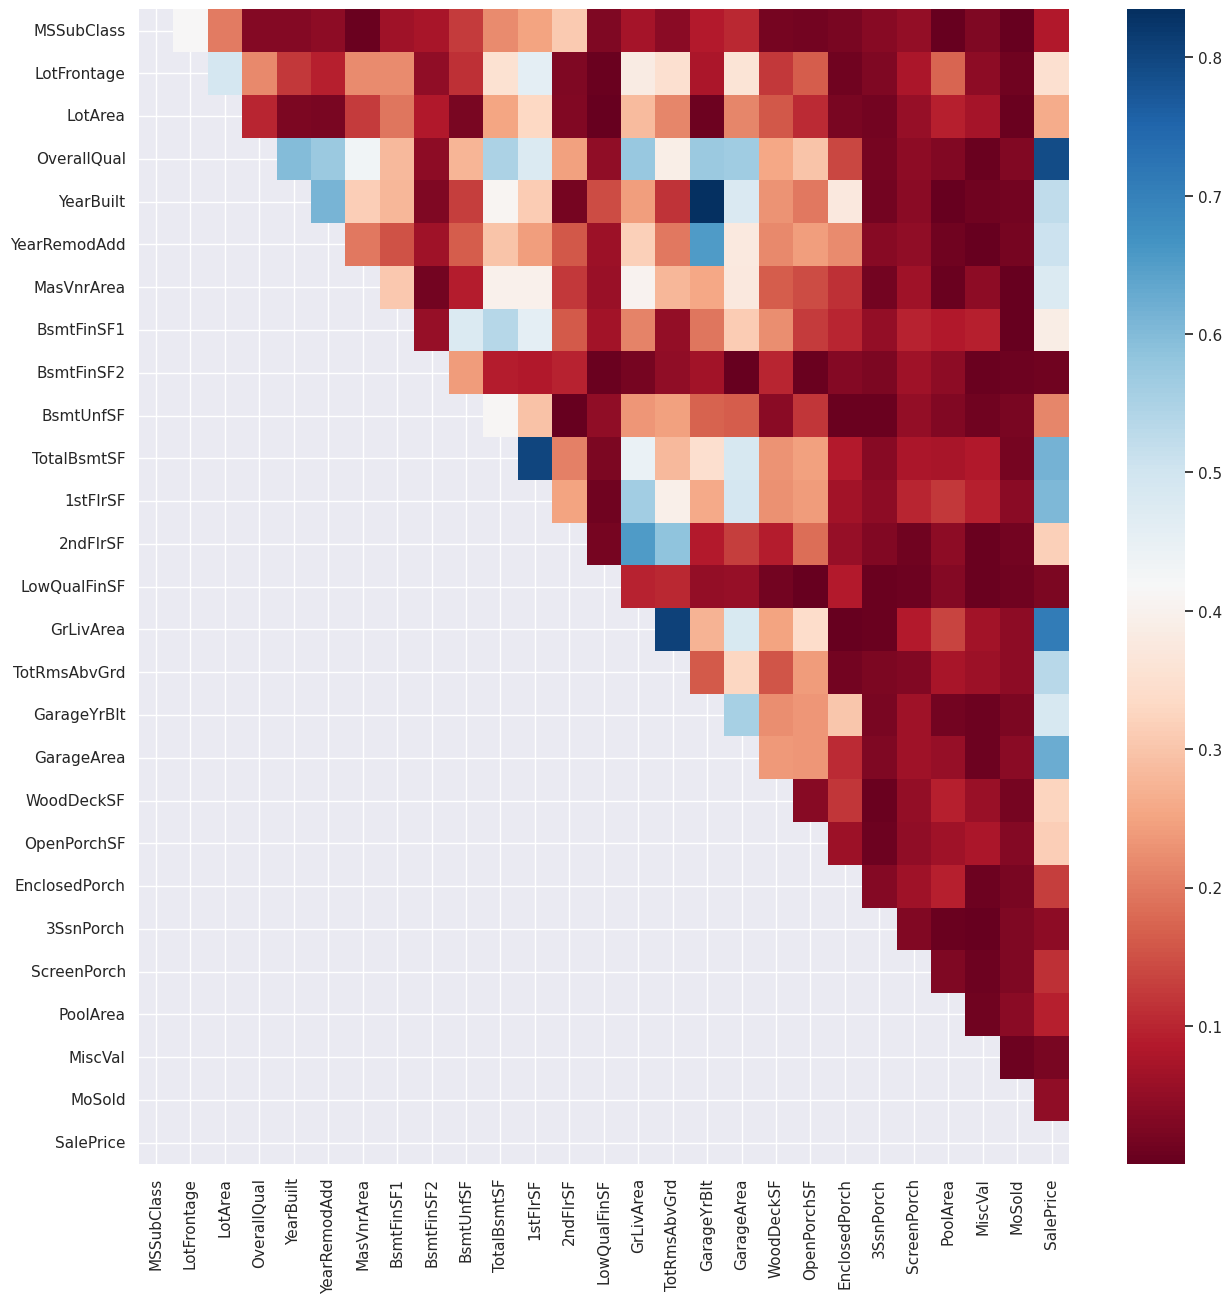

In [10]:
def high_corr_heatmap(dataframe, threshold=0.75, plot=False):
    corr_matrix = dataframe.corr()
    corr_matrix = abs(corr_matrix)
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > threshold)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(upper_triangle_matrix, cmap="RdBu")
        plt.show(block=True)
    return drop_list
high_corr_col=high_corr_heatmap(df[num_cols], threshold=0.75, plot=True)